# the Way I take to finally modelise a cell with the cannell and allen model

-first a simple diffusion equation with just a Laplacian to indestant the different way to use discretisation, border condition etc...
-second a space with 2 split in two where the only interaction between the two is a one way diffusion.
-3 we resolve numerically the Fisher-Kolmogoroff equation, with a birst/death term plus the diffuion term.




# First code, simple laplacien
Without border condition we don't have problems, but with the neumman border condition it look like there is a problem for long period condition.... 
This problem don't seem to be too important for big space studies ( with a lots of points). 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

if 'qt' in plt.get_backend().lower():
    try:
        from PyQt4 import QtGui
    except ImportError:
        from PySide import QtGui


# PHYSICAL PARAMETERS
Lx = 1.0   #Domain size x
Ly = 1.0   #Domain size y
Time = 1000 #Integration time
D=0.01

def laplacian(Z):
    Zxless = Z[0:-2,1:-1]
    Zyless = Z[1:-1,0:-2]
    Zxplus = Z[2:,1:-1]
    Zyplus = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return ((Zxless+ Zxplus - 2 * Zcenter)/ dx**2 ) + (Zyless + Zyplus -2* Zcenter) / dy**2
# NUMERICAL PARAMETERS

NT = 1000000     #Number of time steps
NX = 10        #Number of grid points in x
NY = 10        #Number of grid points in y
dt = Time/NT   #Grid step (time)
dx = Lx/(NX-1) #Grid step in x (space)
dy = Ly/(NY-1) #Grid step in y (space)

xx = np.linspace(0,Lx,NX)
yy = np.linspace(0,Ly,NY)

plt.ion()
plt.figure()

### MAIN PROGRAM ###

N = np.zeros((NX,NY))

N[5,5]= 1
fig = plt.figure()
ims = []
# Main loop
for n in range(0,NT):
    deltaN = laplacian(N)
    # We take the values of N inside the grid.
    Nc = N[1:-1,1:-1]
    # We update the variables. Border condition
    N[1:-1,1:-1] = Nc+ dt*(D*deltaN )
    N[0,:] = N[1,:]
    N[-1,:] = N[-2,:]
    N[:,0] = N[:,1]
    N[:,-1] =  N[:,-2]

#Plot every 100 time steps
    if (n%100 == 0):
        plotlabel = "t = %1.2f" %(n * dt)
        plt.pcolormesh(xx,yy,N, shading='flat')
        plt.title(plotlabel)
        plt.axis('image')
        plt.draw()
        plt.show()
        #im = plt.imshow(N, animated=True)
        #ims.append([im])
        if 'qt' in plt.get_backend().lower():
            QtGui.qApp.processEvents()
           

#ani=animation.ArtistAnimation(fig, ims, interval=5, blit=True,repeat_delay=10) 
#ani.save('diff5.mp4', fps=100, writer="avconv", codec="libx264")

plt.show()


# Second code, the split space with a siple laplacian
the one way diffusion from the beow space to the uper space is the only intercation between the two.
Here we don't use the Laplacian function because this function don't have the calable enouth to split the space in two.

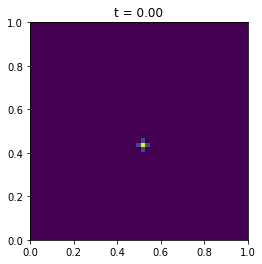

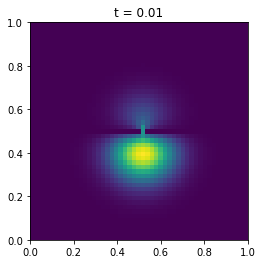

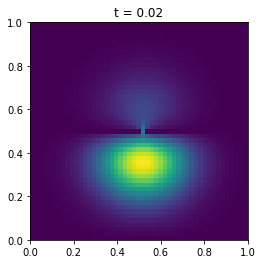

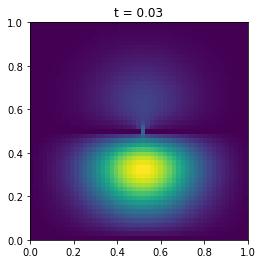

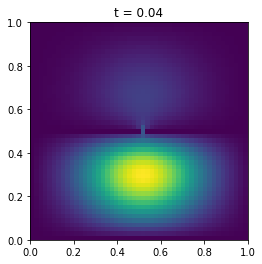

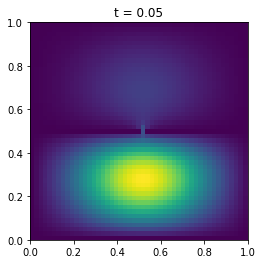

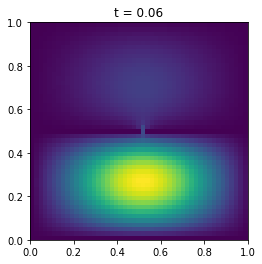

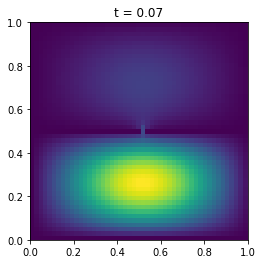

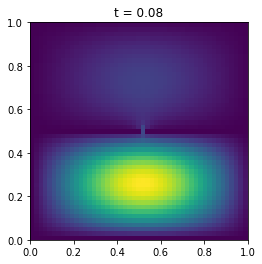

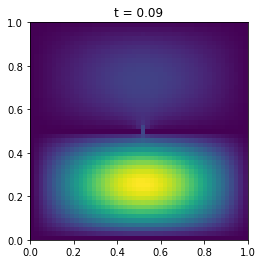

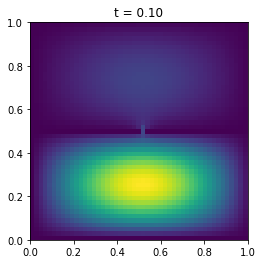

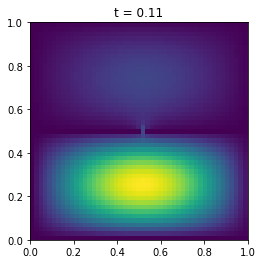

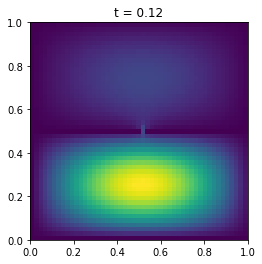

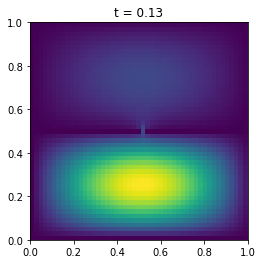

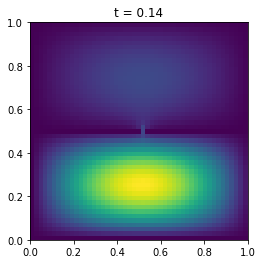

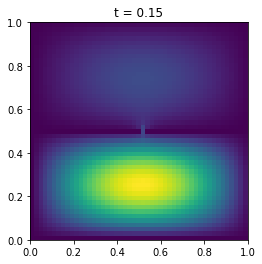

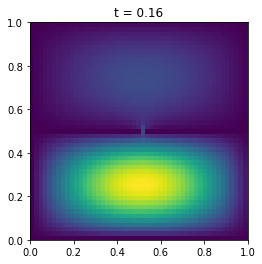

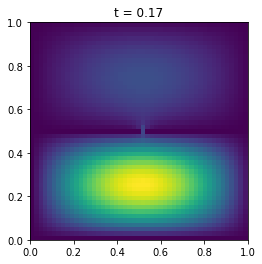

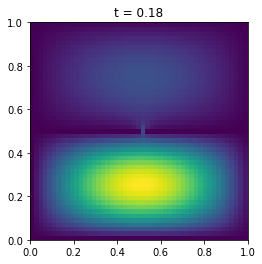

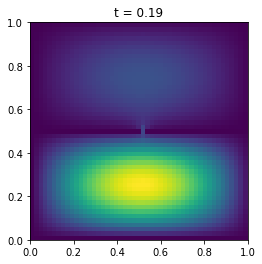

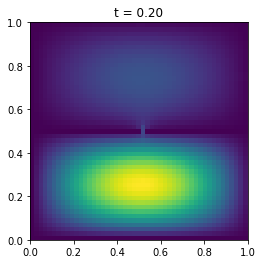

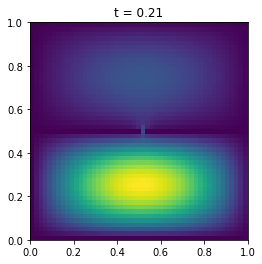

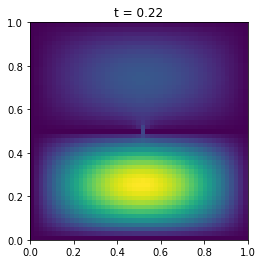

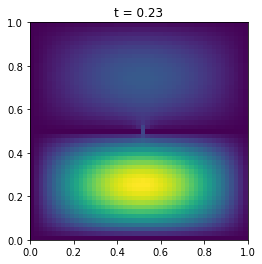

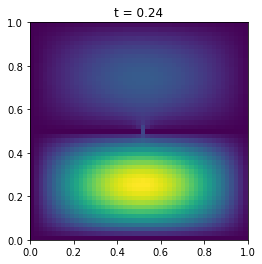

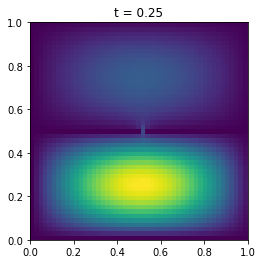

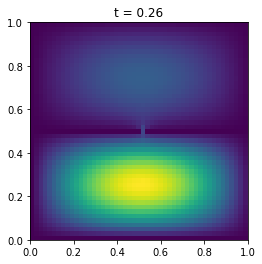

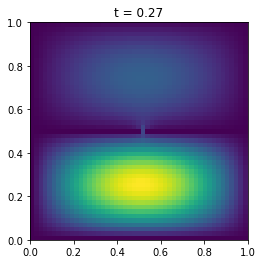

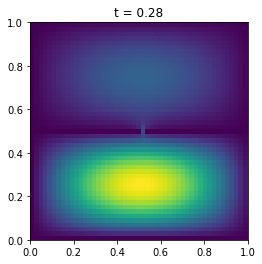

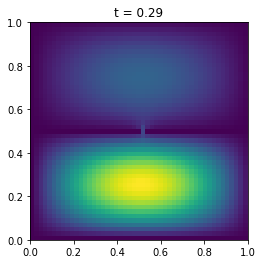

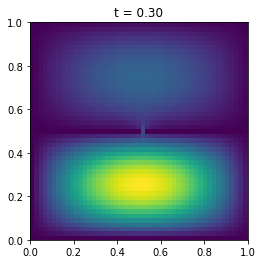

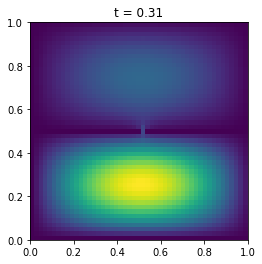

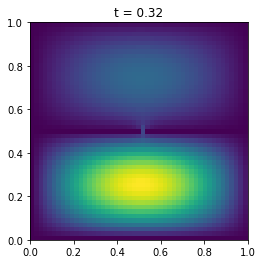

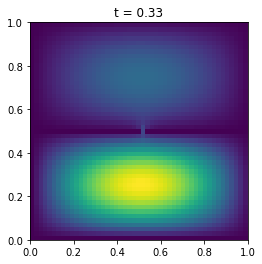

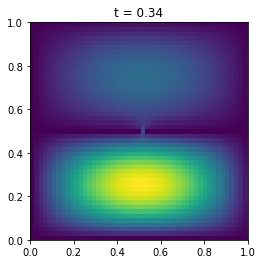

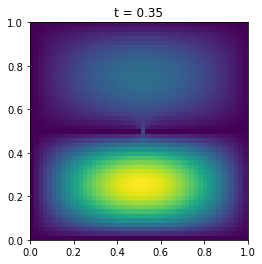

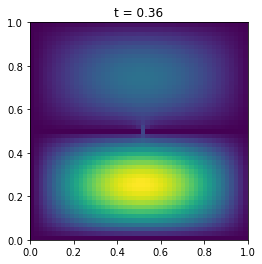

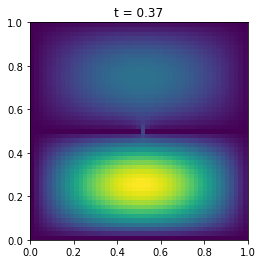

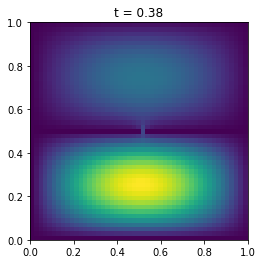

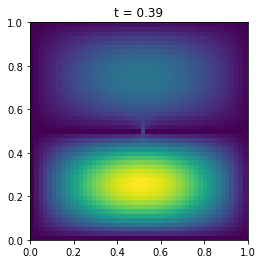

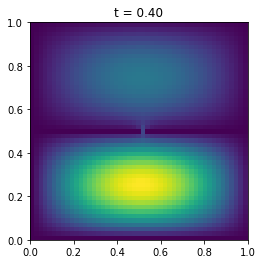

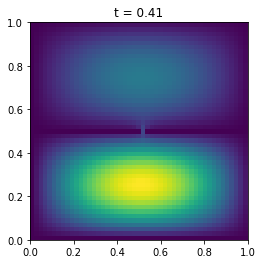

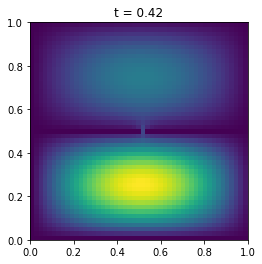

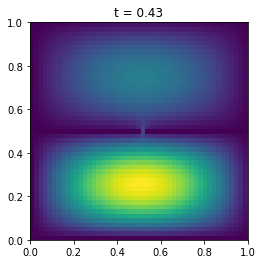

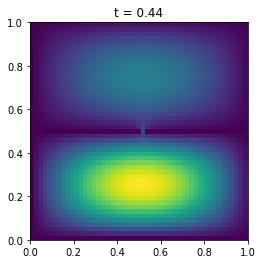

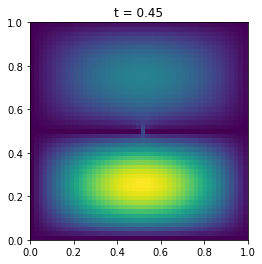

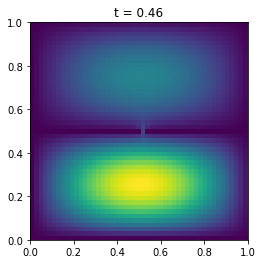

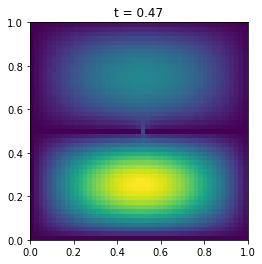

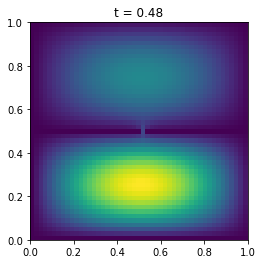

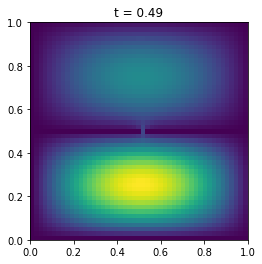

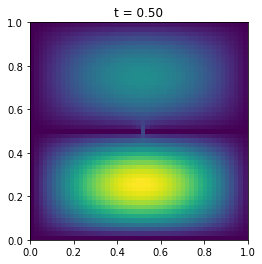

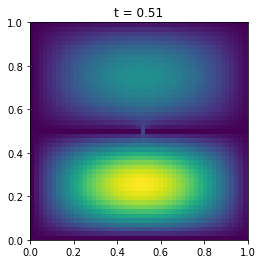

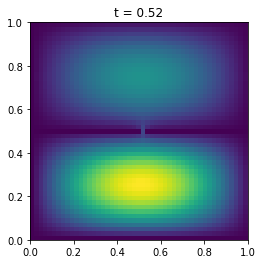

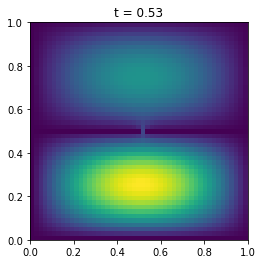

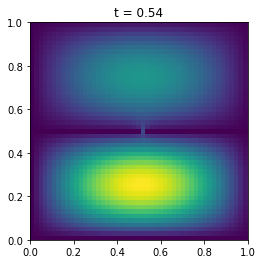

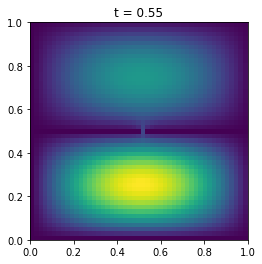

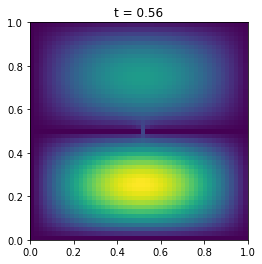

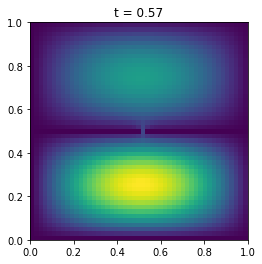

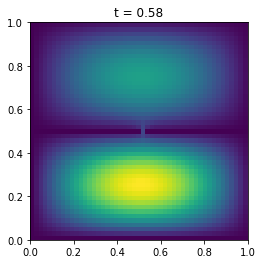

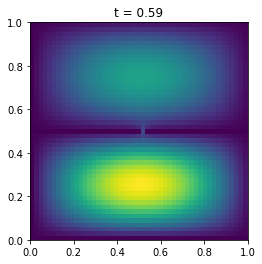

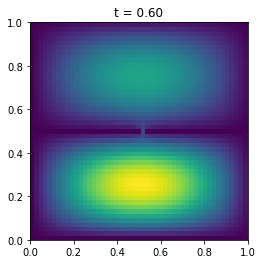

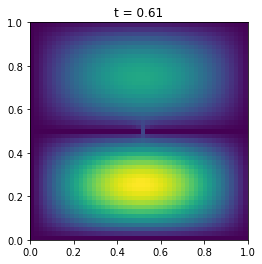

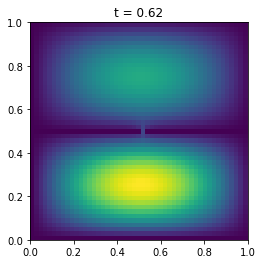

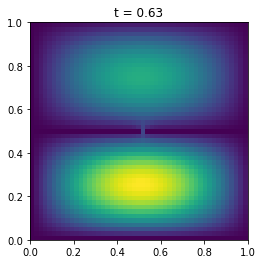

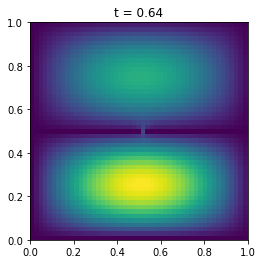

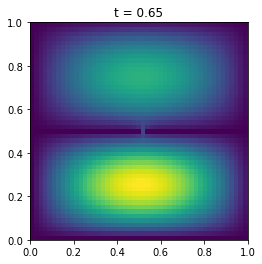

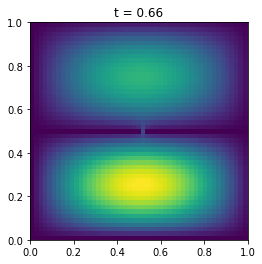

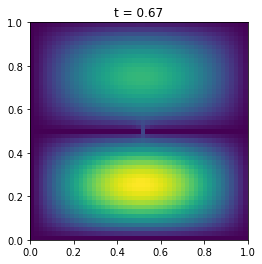

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
if 'qt' in plt.get_backend().lower():
    try:
        from PyQt4 import QtGui
    except ImportError:
        from PySide import QtGui


# PHYSICAL PARAMETERS
D = 0.5    #Diffusion coefficient
Lx = 1.0   #Domain size x
Ly = 1.0   #Domain size y
Time =1#Integration time
S = 1.0    #Source term

# NUMERICAL PARAMETERS

NT = 10000     #Number of time steps
NX = 50        #Number of grid points in x
NY = 50        #Number of grid points in y
dt = Time/NT   #Grid step (time)
dx = Lx/(NX-1) #Grid step in x (space)
dy = Ly/(NY-1) #Grid step in y (space)

xx = np.linspace(0,Lx,NX)
yy = np.linspace(0,Ly,NY)

plt.ion()
plt.figure()

fig = plt.figure()
ims = []   
    
### MAIN PROGRAM ###
# b is the split's coordonate for y=b
b=25
T = np.zeros((NX,NY))
RHS = np.zeros((NX,NY))
T[21,25]=1
# Main loop
for n in range(0,NT):
    RHS[b:-1,1:-1] = dt*D*( (T[(b-1):-2,1:-1]-2*T[(b):-1,1:-1]+T[(b+1):,1:-1])/(dx**2)  \
                         + (T[b:-1,:-2]-2*T[b:-1,1:-1]+T[b:-1,2:])/(dy**2) )
    T[b:-1,1:-1] += (RHS[b:-1,1:-1])
    
    RHS[1:(b-1),1:-1] = dt*D*( (T[:(b-2),1:-1]-2*T[1:(b-1),1:-1]+T[2:b,1:-1])/(dx**2)  \
                         + (T[1:(b-1),:-2]-2*T[1:(b-1),1:-1]+T[1:(b-1),2:])/(dy**2) )
    T[1:(b-1),1:-1] += (RHS[1:(b-1),1:-1])
    T[(b-1),25]= T[b,25]=T[(b-2),25]
    
#Plot every 100 time steps
    if (n%100 == 0):
        plotlabel = "t = %1.2f" %(n * dt)
        plt.pcolormesh(xx,yy,T, shading='flat')
        plt.title(plotlabel)
        plt.axis('image')
        plt.draw()
        im = plt.imshow(T, animated=True)
        ims.append([im])
        plt.show()
        if 'qt' in plt.get_backend().lower():
            QtGui.qApp.processEvents()
            
ani=animation.ArtistAnimation(fig, ims, interval=100, blit=True,repeat_delay=1) 
ani.save('diff6.mp4', fps=20, writer="avconv", codec="libx264")
plt.show()

# 3 code the Fisher-Kolmogoroff equation

$$
\frac{\partial n(x,y,t)}{\partial t}=rn(x,y,t)(1-\frac{n(x,y,t)}{k})+D(\bigtriangledown ^{2}n(x,y,t))
$$
where k,r and D are constants




In [ ]:
 scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import *
from random import randint
import matplotlib.animation as animation
Lx=1
Ly=1
Ny=30
Nx=30
dy=Ly/Ny
dx = Lx/Nx  # space step
D=0.1
r=0.1
k=1
NT=4000
T = 10  # total time
dt= T/NT 
#dt = .9 * dx**2/2  # time step
n = int(T/dt)

N = np.zeros((Nx, Ny))
N[5,5]= 0.01  

def laplacian(Z):
    Zxless = Z[0:-2,1:-1]
    Zyless = Z[1:-1,0:-2]
    Zxplus = Z[2:,1:-1]
    Zyplus = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return ((Zxless+ Zxplus - 2 * Zcenter)/ dx**2 ) + (Zyless + Zyplus -2* Zcenter) / dy**2
fig = plt.figure()
ims = []  
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of N
    deltaN = laplacian(N)
    # We take the values of N inside the grid.
    Nc = N[1:-1,1:-1]
    # We update the variables.
    N[1:-1,1:-1] =  Nc + dt * (r*Nc*(1-(Nc/k))+ D*deltaN )
       
    # Neumann conditions: derivatives at the edges
    # are null.
    #N[0,:] = N[1,:]
    #N[-1,:] = N[-2,:]
    #N[:,0] = N[:,1]
    #N[:,-1] =  N[:,-2] 
    if (n%100 == 0):
        im = plt.imshow(N, animated=True)
        ims.append([im])
        plt.show()
        #plt.imshow(N, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
        #plt.xticks([]); plt.yticks([]);
        
ani=animation.ArtistAnimation(fig, ims, interval=5, blit=True,repeat_delay=10) 
ani.save('animation6.mp4', fps=100, writer="avconv", codec="libx264")
